In [5]:
from keras.datasets import mnist
(train_X, train_y), (test_X, test_y) = mnist.load_data()


In [6]:
import matplotlib.pyplot as plt
import numpy as np

In [7]:
#Function to find tss based threshold
def otsufinder(im):
    maxsum=float('inf')
    maxthres=-1
    foregroundisless=True
    hist=[0 for i in range(256)]
    for g in range(28):
      for h in range(28):
        hist[im[g][h]]=hist[im[g][h]]+1
    
        
    for t in range(256):
        
        w1=0
        w2=0
        avg1=0
        avg2=0
        tss1=0
        tss2=0
        for q in range(256):
          if q<=t:
            w1=w1+hist[q]
            avg1=avg1+(hist[q]*q)
          else:
            w2=w2+hist[q]
            avg2=avg2+(hist[q]*q)
        avg1=(avg1+0.0001)/(w1+0.0001)
        avg2=(avg2+0.0001)/(w2+0.0001)
        for r in range(256):
          if r<=t:
            tss1=tss1+(hist[r]*((r-avg1)**2))
          else:
            tss2=tss2+(hist[r]*((r-avg2)**2))
        localsum=(tss1)+(tss2)
        if localsum<maxsum:
            maxsum=localsum
            maxthres=t
            foregroundisless=w1>w2
        
        
        
    return (maxsum,maxthres,foregroundisless)
                    

    

In [ ]:
trainotsu=[]
testotsu=[]
for i in range(len(train_X)):
    o=otsufinder(train_X[i])
    res=foregroundcalculator(train_X[i],o[1])
    trainotsu.append(res)
    

In [ ]:
import pickle
file_name = "wrongtss.pkl"

open_file = open(file_name, "wb")
pickle.dump(trainotsu, open_file)
open_file.close()

In [5]:
otsufinder(train_X[0])

(355764.886596757, 108, True)

In [6]:
wrongtss=pickle.load(open('wrongtss.pkl', 'rb'))


NameError: name 'pickle' is not defined

In [44]:
def imageinverse(wrong):
  ans=np.zeros((28,28))
  for i in range(28):
    for j in range(28):
      ans[i][j]=1-wrong[i][j]
  return ans


In [ ]:
rightss=[]
for i in range(len(wrongtss)):
  img=imageinverse(wrongtss[i])
  rightss.append(img)

In [ ]:
file_name = "righttss.pkl"

open_file = open(file_name, "wb")
pickle.dump(rightss, open_file)
open_file.close()

In [8]:
import pickle
traintss=pickle.load(open('righttss.pkl', 'rb'))


In [ ]:
testtss=[]
for i in range(len(test_X)):
    o=otsufinder(test_X[i])
    res=foregroundcalculatorcorrect(test_X[i],o[1])
    testtss.append(res)

In [ ]:
file_name = "testtss.pkl"

open_file = open(file_name, "wb")
pickle.dump(testtss, open_file)
open_file.close()

In [9]:
import pickle
testtss=pickle.load(open('testtss.pkl', 'rb'))


In [10]:
def foregroundcalculator(im,t):
    sampleim=np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            if im[i][j]<=t:
                sampleim[i][j]=1
            else:
                sampleim[i][j]=0
    return sampleim


In [11]:
def foregroundcalculatorcorrect(im,t):
    sampleim=np.zeros((28,28))
    for i in range(28):
        for j in range(28):
            if im[i][j]<=t:
                sampleim[i][j]=0
            else:
                sampleim[i][j]=1
    return sampleim


In [5]:
import cv2 as cv

In [14]:
testtss[2] = testtss[2].astype(np.uint8)


In [15]:
im2, contours = cv.findContours(train_X[2], cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


In [113]:
testtss[4]=testtss[4].astype(np.uint8)

contours, hierarchy = cv.findContours(testtss[3], 
    cv.RETR_EXTERNAL, cv.CHAIN_APPROX_NONE)

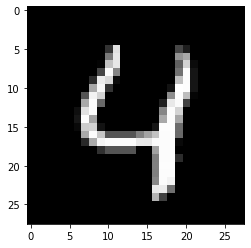

In [11]:
plt.imshow(test_X[4],cmap='gray')

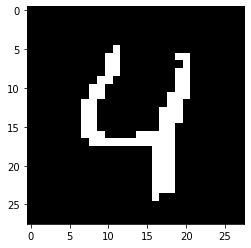

In [10]:
#testtss[3]=testtss[3].astype(np.uint8)

plt.imshow(testtss[4] ,cmap='gray')

In [116]:
x=testtss[4].copy()

In [117]:
y=cv.drawContours(x, contours, -1, (0, 255, 0), 3)

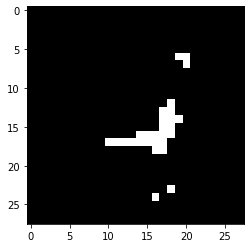

In [118]:
plt.imshow(y,cmap='gray')

In [14]:
def circlemaker(im):
    points=[]
    for i in range(28):
        for j in range(28):
            if im[i][j]==1:
                points.append([i,j])
    points=np.array(points)
    points=points.astype(np.int)
    (x,y),radius = cv.minEnclosingCircle(points)
    return int(x),int(y),int(radius)+1
    
    

In [15]:
aq=circlemaker(traintss[2])
aq

(13, 13, 12)

In [16]:
def circledrawing(im,radius,x,y):
    colorim=np.zeros((28,28,3))
    for i in range(28):
      for j in range(28):
        if im[i][j]==1:
          colorim[i][j][0]=255
          colorim[i][j][1]=255
          colorim[i][j][2]=255
    imge=cv.circle(colorim,(x,y),radius,(255,0,0),1)
    return imge


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


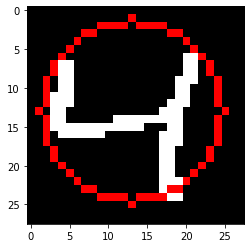

In [17]:
plt.imshow(circledrawing(traintss[2],aq[2],aq[0],aq[1]))

In [18]:
newim=np.zeros((56,56))
 

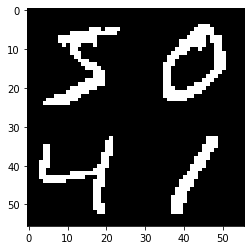

In [19]:
plt.imshow(newim,cmap='gray')

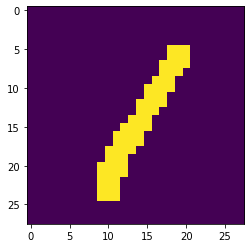

In [20]:
plt.imshow(traintss[3])

In [25]:
circledata=[]

In [26]:
 for i in range(len(traintss)):
        l=[0 for a in range(13)]
        l[train_y[i]]=1
        ci=circlemaker(traintss[i])
        l[10]=ci[0]
        l[11]=ci[1]
        l[12]=ci[2]
        circledata.append(l)


In [29]:
import pandas as pd
circledf=pd.DataFrame(circledata)
circledf.to_csv("circledatabase.csv",index=False,header=["O membership","1 membership","2 membership","3 membership","4 membership","5 membership","6 membership","7 membership","8 membership","9 membership","centre x","centre y","radius"])

In [30]:
file_name = "circledatatrain.pkl"

open_file = open(file_name, "wb")
pickle.dump(circledata, open_file)
open_file.close()

In [32]:
circledatatest=[]

In [33]:
for i in range(len(testtss)):
        l=[0 for a in range(13)]
        l[test_y[i]]=1
        ci=circlemaker(testtss[i])
        l[10]=ci[0]
        l[11]=ci[1]
        l[12]=ci[2]
        circledatatest.append(l)


In [37]:
circledftest=pd.DataFrame(circledatatest)
circledftest.to_csv("circledatabasetest.csv",index=False,header=["O membership","1 membership","2 membership","3 membership","4 membership","5 membership","6 membership","7 membership","8 membership","9 membership","centre x","centre y","radius"])

In [36]:
len(circledatatest)

10000

In [38]:
file_name = "circledatatest.pkl"

open_file = open(file_name, "wb")
pickle.dump(circledatatest, open_file)
open_file.close()

In [21]:
import random


In [119]:
train4imagesy=[]
train4imagesx=[]
for j in range(15000):
    maps=np.zeros((56,56,11))
    concatimage=np.zeros((56,56))
    for i in range(4):
        rnd=random.randint(0,59999)
        label=train_y[rnd]
#         print(label)
#         print(maps.shape)
#         print(maps[:,:,label+1].shape)
        if i==0:
            maps[:,:,label][0:28,0:28]=traintss[rnd]
            maps[:,:,10][0:28,0:28]=imageinverse(traintss[rnd])
            concatimage[0:28,0:28]=traintss[rnd]
        if i==1:
            maps[:,:,label][0:28,28:56]=traintss[rnd]
            maps[:,:,10][0:28,28:56]=imageinverse(traintss[rnd])
            concatimage[0:28,28:56]=traintss[rnd]
        if i==2:
            maps[:,:,label][28:56,0:28]=traintss[rnd]
            maps[:,:,10][28:56,0:28]=imageinverse(traintss[rnd])
            concatimage[28:56,0:28]=traintss[rnd]
        if i==3:
            maps[:,:,label][28:56,28:56]=traintss[rnd]
            maps[:,:,10][28:56,28:56]=imageinverse(traintss[rnd])
            concatimage[28:56,28:56]=traintss[rnd]
    train4imagesy.append(maps)
    train4imagesx.append(concatimage)

        

        
    

In [120]:
train4imagesy=np.array(train4imagesy)
train4imagesy=train4imagesy.astype(np.float32)
train4imagesx=np.array(train4imagesx)
train4imagesx=train4imagesx.astype(np.float32)


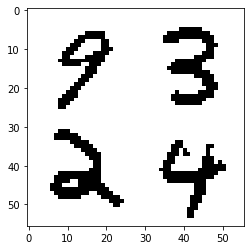

In [121]:
plt.imshow(train4imagesy[1999][:,:,10],cmap='gray')

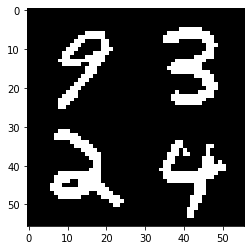

In [122]:
plt.imshow(train4imagesx[1999],cmap='gray')

In [123]:
test4imagesy=[]
test4imagesx=[]
for j in range(1000):
    maps=np.zeros((56,56,11))
    concatimage=np.zeros((56,56))
    for i in range(4):
        rnd=random.randint(0,9999)
        label=test_y[rnd]
        if i==0:
            maps[:,:,label][0:28,0:28]=testtss[rnd]
            maps[:,:,10][0:28,0:28]=imageinverse(testtss[rnd])
            concatimage[0:28,0:28]=testtss[rnd]
        if i==1:
            maps[:,:,label][0:28,28:56]=testtss[rnd]
            maps[:,:,10][0:28,28:56]=imageinverse(testtss[rnd])
            concatimage[0:28,28:56]=testtss[rnd]
        if i==2:
            maps[:,:,label][28:56,0:28]=testtss[rnd]
            maps[:,:,10][28:56,0:28]=imageinverse(testtss[rnd])
            concatimage[28:56,0:28]=testtss[rnd]
        if i==3:
            maps[:,:,label][28:56,28:56]=testtss[rnd]
            maps[:,:,10][28:56,28:56]=imageinverse(testtss[rnd])
            concatimage[28:56,28:56]=testtss[rnd]
    test4imagesy.append(maps)
    test4imagesx.append(concatimage)


In [124]:
test4imagesy=np.array(test4imagesy)
test4imagesy=test4imagesy.astype(np.float32)
test4imagesx=np.array(test4imagesx)
test4imagesx=test4imagesx.astype(np.float32)

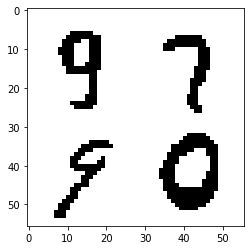

In [125]:
plt.imshow(train4imagesy[999][:,:,10],cmap='gray')

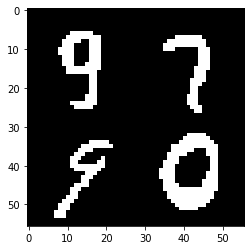

In [126]:
plt.imshow(train4imagesx[999],cmap='gray')

In [127]:
file_name = "train4imagesx.pkl"

open_file = open(file_name, "wb")
pickle.dump(train4imagesx, open_file)
open_file.close()

In [128]:
file_name = "train4imagesy.pkl"

open_file = open(file_name, "wb")
pickle.dump(train4imagesy, open_file)
open_file.close()

In [129]:
file_name = "test4imagesx.pkl"

open_file = open(file_name, "wb")
pickle.dump(test4imagesx, open_file)
open_file.close()

In [130]:
file_name = "test4imagesy.pkl"

open_file = open(file_name, "wb")
pickle.dump(test4imagesy, open_file)
open_file.close()

In [7]:
p=np.zeros((28,28,11))

In [8]:
p[0][0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [19]:
p[27][27]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [12]:
p[0].shape

(28, 11)

In [20]:
p[:,:,:11][:,:,0].shape
#result = predictions[0][:, :, 0]


(28, 28)

In [12]:
forshowing=pickle.load(open('train4imagesy.pkl', 'rb'))


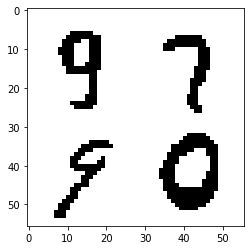

In [29]:
plt.imshow(forshowing[999][:,:,10],cmap='gray')